<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe5-BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Arreglo de tamaño $n$ con valores numéricos $[a_1,a_2,...,a_n]$ tal que $0 \leq a < 1$

**Salida**: Arreglo de la forma: $[a_1',a_2',...,a_n']$, de modo que $a_1'\leq a_2' \leq... \leq a_n'$.

Ordenar una secuencia de números es un problema bastante recurrente en el mundo de la informática. La infinidad de algoritmos que se han inventado para resolver este problema, ha permitido que los programadores los puedan clasificar en base a distintos criterios, como por ejemplo, su eficiencia temporal y espacial, su naturaleza recursiva o iterativa, etc.

Otro de estos criterios para comparar algoritmos, quizá menos importante a primera vista, se relaciona con el método de ordenamiento utilizado, el cual puede ser **comparativo o no comparativo**. Los algoritmos comparativos, como por ejemplo **InsertionSort** y **QuickSort** determinan el orden de los elementos en base a comparaciones realizadas entre los elementos de entrada. Los algoritmos no comparativos utilizan otras operaciones para determinar el orden de los elementos, como por ejemplo, **CountingSort**, **RadixSort** y **BucketSort**.

Los algoritmos no comparativos comparten, además, la propiedad de resolver el problema de ordenamiento en **tiempo lineal**. Sin embargo, también se diferencian del resto de algoritmos pues requieren de condiciones especiales en los valores de entrada para que funcionen correctamente. Por ejemplo, **BucketSort** asume que los datos de entrada están uniformente distribuidos.





# 2. BucketSort

## 2.1 Código

El siguiente código muestra una implementación del algoritmo BucketSort para valores de entrada distribuidos entre [0, 1)

In [216]:
def insertion_sort(A):
  for i in range(1, len(A)):
    j = i

    while j > 0 and A[j] < A[j - 1]:
      A[j], A[j - 1] = A[j - 1], A[j]
      j -= 1

  return A

In [217]:
from termcolor import colored

def bucket_sort(A, m, verbose=False):
  B = []
  C = []

  if verbose == True:
    print(f"Entrada: {A}\n")
    print(f"Creando arreglo con {m} buckets\n")

  for k in range(0, m):
    B.append([])

  for i in range(0, len(A)):
    k = int(A[i] * m)
    B[k].append(A[i])

    if verbose == True:
      print(f"Insertando elemento {A[i]} en el bucket {k}")

  if verbose == True:
    print()
    for k in range(0, m):
      print(colored(f"[{k}] ", "magenta") + f"{B[k]}")    

  for k in range(0, m):
    insertion_sort(B[k])

  if verbose == True:
    print("\nOrdenando buckets con insertion sort\n")
    for k in range(0, m):
      print(colored(f"[{k}] ", "magenta") + f"{B[k]}") 

  for i in range(0, m):
    for j in range(len(B[i])):
      C.append(B[i][j])

  if verbose == True:
    print(f"\nConcatenando buckets\n")
    print(f"Salida: {C}")

  return C
  
A = [0.12, 0.32, 0.48, 0.76, 0.21, 0.14, 0.28, 0.26, 0.9, 0.24]
bucket_sort(A, 10)

[0.12, 0.14, 0.21, 0.24, 0.26, 0.28, 0.32, 0.48, 0.76, 0.9]

## 2.2 Descripción del algoritmo

La entrada consiste en un arreglo $A$ de $n$ elementos cuyos valores están un rango de 0 a 1, y un parámetro $m$ que corresponde a la cantidad de listas o buckets donde se guardarán los elementos. BucketSort retorna un arreglo con los mismos elementos de la secuencia de entrada ordenados de menor a mayor. Los pasos realizados por el algoritmo son los siguientes:

1. Se crea un arreglo auxiliar $B$ de tamaño $m$, donde cada casilla corresponde a una lista vacía.

2. Cada elemento $A[i]$ es insertado en un bucket $B[k]$, donde $k$ corresponde a la parte entera de $m \cdot A[i]$

3. Cada bucket $B[k]$ se ordena utilizando `insertion_sort`.

4. Se concatenan todos los buckets para formar un nuevo arreglo $C$ ordenado de menor a mayor.

## 2.3 Ejemplo

Consideremos la siguiente entrada:

![picture](https://drive.google.com/uc?export=view&id=1da0oovBO0T1YOMao7QBfEwvw7lC5Pogd)

En primer lugar, crearemos el arreglo $B$ con 10 buckets vacíos:

![picture](https://drive.google.com/uc?export=view&id=1Hx8OXhhxs97C3tYfMBaT0NnNRtWAEnax)

A continuación, moveremos cada elemento del arreglo $A$ al bucket $10 \cdot A[i]$. Observemos que este valor corresponde a la décima del elemento:

![picture](https://drive.google.com/uc?export=view&id=1czQb-2gYyUE1t8B3mvIOViHr_SB4UX2S)

Luego, ordenaremos cada bucket de menor a mayor utilizando `insertion_sort`:

![picture](https://drive.google.com/uc?export=view&id=1bDlu-BkIEX_TnI6CRxBnlDt0in6ZS9Eq)

Finalmente, concatenaremos cada bucket secuencialmente desde 0 hasta 9, formando un arreglo ordenado con todos los elementos de la secuencia de entrada:

![picture](https://drive.google.com/uc?export=view&id=1X3N_m7fisptF8zx0uqUrQLLp69ysHbL4)

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [218]:
import random
A = []

for i in range(0, 10):
  A.append(round(random.uniform(0, 0.99), 2))

A = bucket_sort(A, 10, True)

Entrada: [0.48, 0.4, 0.74, 0.01, 0.96, 0.57, 0.91, 0.75, 0.92, 0.09]

Creando arreglo con 10 buckets

Insertando elemento 0.48 en el bucket 4
Insertando elemento 0.4 en el bucket 4
Insertando elemento 0.74 en el bucket 7
Insertando elemento 0.01 en el bucket 0
Insertando elemento 0.96 en el bucket 9
Insertando elemento 0.57 en el bucket 5
Insertando elemento 0.91 en el bucket 9
Insertando elemento 0.75 en el bucket 7
Insertando elemento 0.92 en el bucket 9
Insertando elemento 0.09 en el bucket 0

[0] [0.01, 0.09]
[1] []
[2] []
[3] []
[4] [0.48, 0.4]
[5] [0.57]
[6] []
[7] [0.74, 0.75]
[8] []
[9] [0.96, 0.91, 0.92]

Ordenando buckets con insertion sort

[0] [0.01, 0.09]
[1] []
[2] []
[3] []
[4] [0.4, 0.48]
[5] [0.57]
[6] []
[7] [0.74, 0.75]
[8] []
[9] [0.91, 0.92, 0.96]

Concatenando buckets

Salida: [0.01, 0.09, 0.4, 0.48, 0.57, 0.74, 0.75, 0.91, 0.92, 0.96]


# 3. Correctitud

### **Teorema 1 (Correctitud de BucketSort).**

*El algoritmo BucketSort retorna un arreglo ordenado con los mismos elementos de la secuencia de entrada.*

## Prueba del Teorema

Consideremos los elementos $A[i]$ y $A[j]$, tal que $A[i] \leq A[j]$. Al insertar estos elementos en su bucket correspondiente, pueden ocurrir dos casos:

1. $A[i]$ y $A[j]$ se encuentran en el mismo bucket. En este caso, el algoritmo Insertion Sort colocará estos elementos en el orden correcto.

2. $A[i]$ y $A[j]$ se encuentran en buckets distintos. En este caso $A[i]$ se moverá a un bucket con menor índice que $A[j]$, puesto que $m \cdot A[i] \leq m \cdot A[j]$. Luego, al concatenar los buckets de manera ordenada, ambos elementos quedarán en el orden correcto.

Por lo tanto, queda demostrada la correctitud de BucketSort. $\Box$



# 4. Tiempo de ejecución

### **Teorema 2 (Tiempo de ejecución).**

*El algoritmo **BucketSort** tiene un **tiempo de ejecución** de $O(n)$ en el caso promedio y en el mejor caso, y $O(n^2)$ en el peor caso.*

## Prueba del teorema

### Mejor caso y caso promedio

Consideremos $m$ como el número de buckets utilizados por el algoritmo. A continuación, analizaremos el tiempo ocupado en cada paso de BucketSort por separado.

1. El primer paso realizado por el algoritmo consiste en inicializar el arreglo de buckets. Esta operación tiene un tiempo de $O(m)$.

2. Luego, cada elemento del arreglo de entrada se mueve al bucket correspondiente, lo cual tiene un tiempo de $O(n)$.

3. Una vez terminado el paso anterior, cada bucket se ordena utilizando Insertion Sort, el cual tiene una complejidad $O(n^2)$. Si los valores de entrada están distribuidos de manera uniforme, la cantidad de elementos por cada bucket será aproximadamente la misma. Es decir, Insertion Sort ordenará $\frac{n}{m}$ elementos por cada bucket. La complejidad de ordenar todos los buckets será, por lo tanto, $O(m \cdot (\frac{n}{m})^2)$

4. Finalmente se concatenan los buckets ordenados. Esta operación tiene un tiempo de $O(m)$.

Luego, el tiempo total del algoritmo BucketSort es:

$T(n) = O(m) + O(n) + O(m \cdot (\frac{n}{m})^2)  + O(m)$

Dado un valor de $m$ proporcional a $n$, obtenemos:

$T(n) = O(kn) + O(n) + O(kn \cdot (\frac{n}{kn})^2) + O(kn)$

$T(n) = O(n) + O(kn \cdot (\frac{n}{kn})^2)$

$T(n) = O(n) + O(\frac{n}{k})$

$T(n) = O(n)$

Por lo tanto, el tiempo de Bucket Sort será $O(n)$, siempre y cuando los datos estén **uniformente distribuidos**.

### Peor caso

El peor caso ocurrirá cuando todos los elementos del arreglo de entrada se inserten en un solo bucket. En este caso, predominará la complejidad temporal de Insertion Sort, pues el tiempo ocupado por este algoritmo en ordenar $n$ elementos es $O(n^2)$.

# 5. Experimentos

## 5.1. Comparación con Counting Sort y Radix Sort

A continuación se muestra la implementación de los algoritmos Counting Sort y Radix Sort, los cuales, al igual que Bucket Sort, poseen complejidad lineal.

In [219]:
def counting_sort(A,k):
  B = [0] * len(A)
  C = [0] * (k+1)

  for i in range(0, len(A)):
    C[A[i]] += 1

  for j in range(1, k+1):
    C[j] += C[j-1]

  for i in range(len(A)-1, -1, -1):
    B[C[A[i]]-1] = A[i]
    C[A[i]] -= 1

  return B

A = [2,4,1,5,9,6,2,7]
counting_sort(A,9)

[1, 2, 2, 4, 5, 6, 7, 9]

In [220]:
def get_digit(n, d):
  return n % (10 ** d) // (10 ** (d-1))

def radix_sort(A,d):
  for k in range(1, d+1):
    B = [0] * len(A)
    C = [0] * 10

    for i in range(0, len(A)):
      C[get_digit(A[i], k)] += 1

    for j in range(1, 10):
      C[j] += C[j-1]

    for i in range(len(A)-1, -1, -1):
      B[C[get_digit(A[i], k)]-1] = A[i]
      C[get_digit(A[i], k)] -= 1
    
    A = B

  return B

A = [124,29,37,5,372,666,98,4]
radix_sort(A,3)

[4, 5, 29, 37, 98, 124, 372, 666]

Para comparar estos algoritmos con Bucket Sort, implementaremos una nueva versión del algoritmo, que pueda recibir como entrada números enteros.

In [221]:
def int_bucket_sort(A,m):
  max_value = max(A)
  min_value = min(A)
  
  rnge = (max_value - min_value) / (m - 1)
  B = []
  C = []
  
  for i in range(0,m):
    B.append([])
  
  for i in range(len(A)):
    diff = (A[i] - min_value) / rnge - int((A[i] - min_value) / rnge)
  
    if(diff == 0 and A[i] != min_value):
      B[int((A[i] - min_value) / rnge) - 1].append(A[i])
    else:
      B[int((A[i] - min_value) / rnge)].append(A[i])
  
  for k in range(0,m):
    insertion_sort(B[k])

  for i in range(0, m):
    for j in range(len(B[i])):
      C.append(B[i][j])

  return C

A = [9, 1.25, 10.14, 2, 8.66, 4.42, 1.37, 6.0, 0.5, 1.98]
int_bucket_sort(A,67)

[0.5, 1.25, 1.37, 1.98, 2, 4.42, 6.0, 8.66, 9, 10.14]

El siguiente gráfico compara el tiempo de ejecución de cada algoritmo para entradas de tamaño $n ∈ [5,999]$, con valores generados aleatoriamente en el intervalo $[1,999]$.




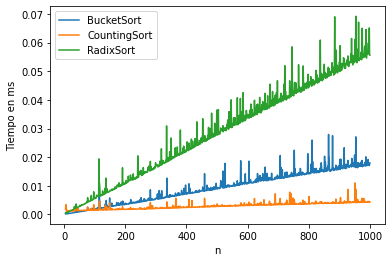

In [237]:
import matplotlib.pyplot as plt
import datetime
import random
from math import sqrt
from timeit import repeat

x=[]; y1=[]; y2=[]; y3=[]
A=[]

for n in range(5,1000):
  A = random.sample(range(1, 1000), n)

  t1 = repeat(setup="from __main__ import int_bucket_sort", stmt=f"int_bucket_sort({A}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import counting_sort", stmt=f"counting_sort({A}, {max(A)})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import radix_sort", stmt=f"radix_sort({A}, 3)", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["BucketSort", "CountingSort", "RadixSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como era de esperar, el tiempo de ejecución de cada algoritmo aumenta en forma lineal. Además, podemos observar que Counting Sort posee un mejor desempeño que Bucket Sort y Radix Sort en cuanto a eficiencia temporal. Sin embargo, se debe tomar en cuenta la gran cantidad de espacio auxiliar ocupado por este algoritmo, que sin duda es una desventaja cuando se trabaja con grandes conjuntos de datos. Radix Sort soluciona este problema, disminuyendo significativamente la cantidad de memoria utilizada, pero a la vez, reduciendo su eficiencia.

Es por ello que podemos considerar a Bucket Sort como un algoritmo que busca el equilibrio entre tiempo y memoria, siendo aún así bastante eficiente en comparación al resto.



## 5.1. Análisis de Bucket Sort respecto a la cantidad de buckets

El siguiente gráfico muestra la variación en el tiempo de ejecución del algoritmo en relación al número de buckets utilizados para ordenar los elementos. Los valores usados como referencia para la cantidad de buckets son $n$, $n/2$ y $\sqrt{n}$.

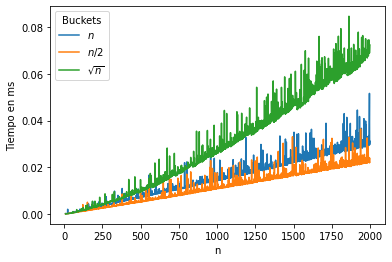

In [238]:
import matplotlib.pyplot as plt
import datetime
import random
from math import sqrt
from timeit import repeat

x=[]; y1=[]; y2=[]; y3=[]; y4=[]

B=[]
for i in range(0,4):
  B.append(round(random.uniform(0, 0.99), 4))

for n in range(10,2000):
  B.append(round(random.uniform(0, 0.99), 4))

  t1 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({B}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({B}, {n//2})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({B}, {int(sqrt(n))})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["$n$", "$n/2$", "$\sqrt{n}$"], title='Buckets')

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Podemos observar que la cantidad de buckets que optimiza la eficiencia del algoritmo es $\frac{n}{2}$. En general, para $\frac{n}{k}$ buckets, se espera que cada bucket contenga $k$ elementos. Por ejemplo, notemos que para $n$ buckets, cada uno contendrá solo 1 elemento. Del mismo modo, para $\frac{n}{2}$ buckets, cada uno contendrá 2 elementos.

Luego, estos elementos serán ordenados mediante Insertion Sort. La cantidad exacta de comparaciones realizadas por este algoritmo viene dada por la fórmula:

$\sum\limits_{i=0}^{k-1} i=\frac{k(k-1)}{2}$

Para $k = 1$, la cantidad de comparaciones realizadas por el algoritmo es 0, mientras que, para $k = 2$, se realiza solo 1 comparación. Al ocupar $\frac{n}{2}$ buckets, se aumenta mínimamente el tiempo de ejecución de Insertion Sort, sin embargo, se reduce el tiempo del resto de operaciones.

Por otra parte, al utilizar $\sqrt{n}$ buckets, estamos afectando la complejidad del algoritmo. Recordemos que la complejidad de Insertion Sort en ordenar cada bucket se calcula como $O(k^2)$, luego, para $\sqrt{n}$ buckets la cantidad de elementos también será $\sqrt{n}$. Es decir, el tiempo ocupado en esta operación es $O(k^2) = O(n)$, lo que implica que el tiempo necesario para ordenar todos los buckets será $O(n\cdot\sqrt{n})$. Esta última complejidad será la que predomine en el algoritmo, lo cual se puede apreciar en el gráfico.

